In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
students = pd.read_csv("students.csv")
attendance = pd.read_csv("attendance.csv")
performance = pd.read_csv("student_performance.csv")

# Display first few rows of each dataset
display(students.head())
display(attendance.head())
display(performance.head())


,ID,Name,Class,Math,Science,English
0,1,Aarav,10,85,90,88
1,2,Sita,10,78,80,82
2,3,Prakash,10,92,95,91
3,4,Maya,10,60,65,70
4,5,Laxmi,10,55,58,62


,ID,Attendance (%)
0,1,95
1,2,88
2,3,98
3,6,70


,ID,Name,Class,Math,Science,English,Attendance (%),Average Marks
0,1,Aarav,10,85,90,88,95.0,87.666667
1,2,Sita,10,78,80,82,88.0,80.000000
2,3,Prakash,10,92,95,91,98.0,92.666667
3,4,Maya,10,60,65,70,0.0,65.000000
4,5,Laxmi,10,55,58,62,0.0,58.333333


In [204]:
# Merge students with attendance
merged = pd.merge(students, attendance, on='ID', how='left')
merged['Attendance (%)'] = merged['Attendance (%)'].fillna(0)

# Calculate average marks
merged['Average Marks'] = merged[['Math', 'Science', 'English']].mean(axis=1)

# Merge with performance CSV (optional check)
final_df = pd.merge(
    merged,
    performance[['ID', 'Average Marks']],
    on='ID',
    how='left',
    suffixes=('_calc', '_csv')
)
# Display merged dataset
display(final_df)


,ID,Name,Class,Math,Science,English,Attendance (%),Average Marks_calc,Average Marks_csv
0,1,Aarav,10,85,90,88,95.0,87.666667,87.666667
1,2,Sita,10,78,80,82,88.0,80.000000,80.000000
2,3,Prakash,10,92,95,91,98.0,92.666667,92.666667
3,4,Maya,10,60,65,70,0.0,65.000000,65.000000
4,5,Laxmi,10,55,58,62,0.0,58.333333,58.333333


In [205]:
# Attendance summary
print("Attendance Summary:\n", final_df['Attendance (%)'].describe())


Attendance Summary:
 count     5.000000
mean     56.200000
std      51.431508
min       0.000000
25%       0.000000
50%      88.000000
75%      95.000000
max      98.000000
Name: Attendance (%), dtype: float64


In [206]:
# After merging
final_df.rename(columns={'Average Marks_calc':'Average Marks'}, inplace=True)
print("\nAverage Marks Summary:\n", final_df['Average Marks'].describe())



Average Marks Summary:
 count     5.000000
mean     76.733333
std      14.665530
min      58.333333
25%      65.000000
50%      80.000000
75%      87.666667
max      92.666667
Name: Average Marks, dtype: float64


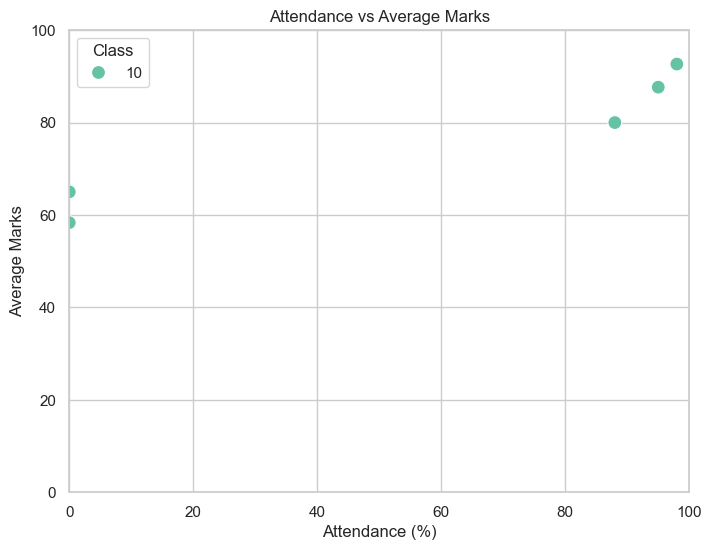

In [207]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Attendance (%)',
    y='Average Marks',
    data=final_df,
    hue='Class',
    s=100,
    palette='Set2'
)
plt.title('Attendance vs Average Marks')
plt.xlabel('Attendance (%)')
plt.ylabel('Average Marks')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend(title='Class')
plt.show()

/var/folders/k9/0ymr366x2c5c2hpzhnpzt0100000gn/T/ipykernel_3665/2064376232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name',


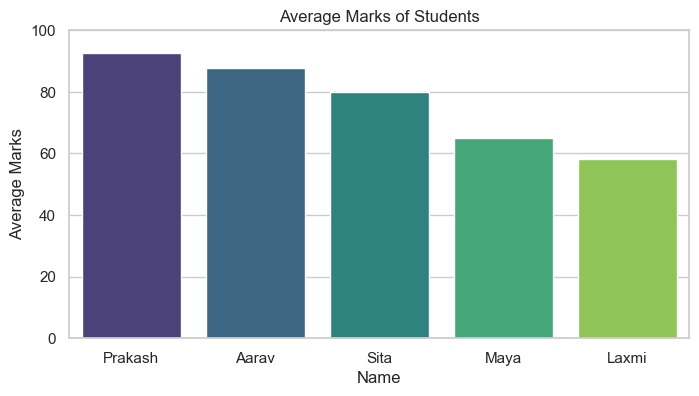

In [208]:
top_students = final_df.sort_values('Average Marks', ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x='Name',
    y='Average Marks',
    data=top_students,
    palette='viridis'
)
plt.title('Average Marks of Students')
plt.ylabel('Average Marks')
plt.ylim(0, 100)
plt.show()

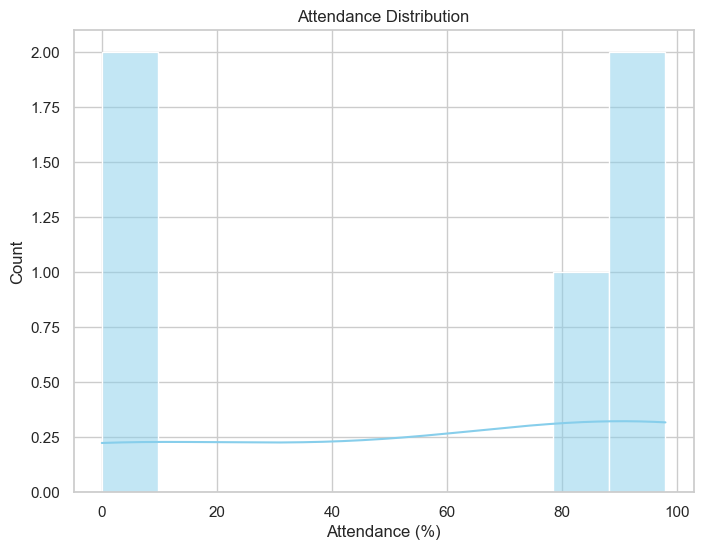

In [209]:
plt.figure(figsize=(8,6))
sns.histplot(final_df['Attendance (%)'], bins=10, kde=True, color='skyblue')
plt.title('Attendance Distribution')
plt.xlabel('Attendance (%)')
plt.show()


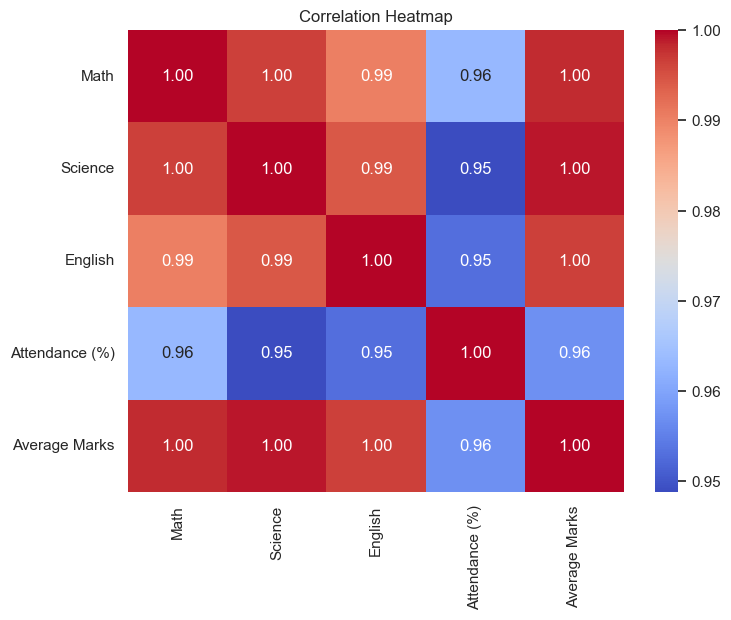

In [210]:
plt.figure(figsize=(8,6))
corr = final_df[['Math','Science','English','Attendance (%)','Average Marks']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
